In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Debug Domain communicate

In [ ]:
# Given flat data
haha = "0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 2 1 1 1 1 1"
flat = list(map(float, haha.split()))

# Dimensions
mx, my= 5, 5

# Reshape to 3D
arr3d = np.array(flat).reshape((my, mx))


In [2]:
# 이제 각 면(ghost layer) 확인
print("i=0\n", arr3d[:, 0])
print("i=-1\n", arr3d[:, -1])

print("j=0\n", arr3d[0, :])
print("j=-1\n", arr3d[-1, :])

i=0
 [0. 0. 0. 0. 1.]
i=-1
 [2. 2. 2. 2. 1.]
j=0
 [0. 0. 0. 0. 2.]
j=-1
 [1. 1. 1. 1. 1.]


In [3]:
arr3d

array([[0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [0., 0., 0., 0., 2.],
       [1., 1., 1., 1., 1.]])

# Debug rhs

In [15]:
nx = 15 # 여기서는 cell의 개수
ny = 15
Lx = 1
Ly = 1
dx = 1/(nx)
dy = 1/ny

f = np.zeros((nx+2, ny+2))

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    x[i] = dx/2 + (i-1)*dx
for j in range(ny+2):
    y[j] = dy/2 + (j-1)*dy

for j in range(ny+2):
    for i in range(nx+2):
        f[i][j] = -2 * np.pi * np.sin(np.pi*x[i]) * np.sin(np.pi*y[j])

In [16]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) 
f

array([[-0.06865134,  0.06865134,  0.20295362,  0.32838585,  0.43946605,  0.53133947,  0.59999081,  0.64241967,  0.6567717 ,  0.64241967,  0.59999081,  0.53133947,  0.43946605,  0.32838585,  0.20295362,  0.06865134, -0.06865134],
       [ 0.06865134, -0.06865134, -0.20295362, -0.32838585, -0.43946605, -0.53133947, -0.59999081, -0.64241967, -0.6567717 , -0.64241967, -0.59999081, -0.53133947, -0.43946605, -0.32838585, -0.20295362, -0.06865134,  0.06865134],
       [ 0.20295362, -0.20295362, -0.59999081, -0.97080552, -1.29919137, -1.57079633, -1.77374994, -1.89918218, -1.94161104, -1.89918218, -1.77374994, -1.57079633, -1.29919137, -0.97080552, -0.59999081, -0.20295362,  0.20295362],
       [ 0.32838585, -0.32838585, -0.97080552, -1.57079633, -2.1021358 , -2.54160185, -2.8699877 , -3.07294132, -3.14159265, -3.07294132, -2.8699877 , -2.54160185, -2.1021358 , -1.57079633, -0.97080552, -0.32838585,  0.32838585],
       [ 0.43946605, -0.43946605, -1.29919137, -2.1021358 , -2.8132068 , -3.4013

In [17]:
haha = "-0.0686513 0.0686513 0.202954 0.328386 0.439466 0.531339 0.599991 0.64242 0.656772 0.64242 0.0686513 -0.0686513 -0.202954 -0.328386 -0.439466 -0.531339 -0.599991 -0.64242 -0.656772 -0.64242 0.202954 -0.202954 -0.599991 -0.970806 -1.29919 -1.5708 -1.77375 -1.89918 -1.94161 -1.89918 0.328386 -0.328386 -0.970806 -1.5708 -2.10214 -2.5416 -2.86999 -3.07294 -3.14159 -3.07294 0.439466 -0.439466 -1.29919 -2.10214 -2.81321 -3.40133 -3.84079 -4.1124 -4.20427 -4.1124 0.531339 -0.531339 -1.5708 -2.5416 -3.40133 -4.1124 -4.64374 -4.97212 -5.0832 -4.97212 0.599991 -0.599991 -1.77375 -2.86999 -3.84079 -4.64374 -5.24373 -5.61454 -5.73998 -5.61454 0.64242 -0.64242 -1.89918 -3.07294 -4.1124 -4.97212 -5.61454 -6.01158 -6.14588 -6.01158 0.656772 -0.656772 -1.94161 -3.14159 -4.20427 -5.0832 -5.73998 -6.14588 -6.28319 -6.14588 0.64242 -0.64242 -1.89918 -3.07294 -4.1124 -4.97212 -5.61454 -6.01158 -6.14588 -6.01158"

In [18]:
flat = np.array(list(map(float, haha.split())))
print(flat.shape)

(100,)


In [19]:
flat.reshape(10, 10) - f[:10, :10]

array([[ 3.69979872e-08, -3.69979872e-08,  3.81858515e-07,  1.47707309e-07, -4.89285570e-08, -4.70434176e-07,  1.92567837e-07,  3.32929957e-07,  2.95414619e-07,  3.32929957e-07],
       [-3.69979872e-08,  3.69979872e-08, -3.81858515e-07, -1.47707309e-07,  4.89285570e-08,  4.70434176e-07, -1.92567837e-07, -3.32929957e-07, -2.95414619e-07, -3.32929957e-07],
       [ 3.81858515e-07, -3.81858515e-07, -1.92567837e-07, -4.80637267e-07,  1.37165542e-06, -3.67320510e-06, -5.50636181e-08,  2.17908759e-06,  1.03872547e-06,  2.17908759e-06],
       [ 1.47707309e-07, -1.47707309e-07, -4.80637267e-07, -3.67320510e-06, -4.20277093e-06,  1.84615763e-06, -2.30154968e-06,  1.31659181e-06,  2.65358979e-06,  1.31659181e-06],
       [-4.89285570e-08,  4.89285570e-08,  1.37165542e-06, -4.20277093e-06, -3.19870290e-06, -2.83111550e-06,  3.21781305e-06, -1.82704747e-06,  1.59445815e-06, -1.82704747e-06],
       [-4.70434176e-07,  4.70434176e-07, -3.67320510e-06,  1.84615763e-06, -2.83111550e-06, -1.82704747e

In [33]:
haha = "0 0 0 0 0 0 0 0 0 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 5 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0"
flat = np.array(list(map(float, haha.split())))

In [34]:
flat.reshape(10, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 5., 6., 6., 6., 6., 6., 6., 6., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# Debug A, B, C, D

In [4]:
nx = 16 # 여기서는 cell의 개수
ny = 16
Lx = 1
Ly = 1
dx = 1/(nx)
dy = 1/ny
dxdx = dx**2

npx = 2
npy = 2


nx1 = int(nx/2) + 2
ny1 = int(ny/2) + 2

A = np.zeros(nx1-2)
B = np.zeros(nx1-2)
C = np.zeros(nx1-2)
D = np.zeros(nx1-2)

idxx = 1
for i in range(nx1-2):
    if idxx==0 and i==0:
        D[i] = 5
    elif idxx==npx-1 and i==nx1-3:
        D[i] = 5
    else:
        D[i] = 6

for i in range(nx1-2):
    A[i] = 1
    B[i] = 4
    C[i] = 1

print(A)
print(B)
print(C)
print(D)


[1. 1. 1. 1. 1. 1. 1. 1.]
[4. 4. 4. 4. 4. 4. 4. 4.]
[1. 1. 1. 1. 1. 1. 1. 1.]
[6. 6. 6. 6. 6. 6. 6. 5.]


In [5]:
n_row = nx1-2

A[0] = A[0]/B[0]
D[0] = D[0]/B[0]
C[0] = C[0]/B[0]

A[1] = A[1]/B[1]
D[1] = D[1]/B[1]
C[1] = C[1]/B[1]

for i in range(2, n_row):
    r = 1/(B[i] - A[i]*C[i-1])
    D[i] = r*(D[i] - A[i]*D[i-1])
    C[i] = r*C[i]
    A[i] = -r*A[i]*A[i-1]

for i in range(n_row-3, 0, -1):
    D[i] = D[i] - C[i]*D[i+1]
    A[i] = A[i] - C[i]*A[i+1]
    C[i] = -C[i]*C[i+1]

r = 1/(1-A[1]*C[0])
D[0] = r*(D[0]-C[0]*D[1])
A[0] = r*A[0]
C[0] = -r*C[0]*C[1]

print(A)
print(B)
print(C)
print(D)

[ 2.67949190e-01  2.67949158e-01 -7.17966335e-02  1.92373755e-02
 -5.15286843e-03  1.37409825e-03 -3.43524562e-04  9.20471281e-05]
[4. 4. 4. 4. 4. 4. 4. 4.]
[ 9.20471281e-05 -3.43524562e-04  1.37409825e-03 -5.15286843e-03
  1.92373755e-02 -7.17966335e-02  2.67949158e-01  2.67949190e-01]
[1.26804124 1.26760563 0.92957746 1.01408451 1.01408451 0.92957746
 1.26760563 1.00009205]


In [13]:
A0 = np.array([ 2.67949190e-01,  2.67949158e-01, -7.17966335e-02,  1.92373755e-02, -5.15286843e-03,  1.37409825e-03, -3.43524562e-04,  9.20471281e-05])
B0 = np.array([4., 4., 4., 4., 4., 4., 4., 4.])/4
C0 = np.array([ 9.20471281e-05, -3.43524562e-04 , 1.37409825e-03 ,-5.15286843e-03,  1.92373755e-02 ,-7.17966335e-02  ,2.67949158e-01  ,2.67949190e-01])
D0 = np.array([1.00009205 ,1.26760563, 0.92957746 ,1.01408451 ,1.01408451, 0.92957746, 1.26760563 ,1.26804124])

A1 = np.array([ 2.67949190e-01 , 2.67949158e-01 ,-7.17966335e-02 , 1.92373755e-02, -5.15286843e-03 , 1.37409825e-03 ,-3.43524562e-04 , 9.20471281e-05])
B1 = np.array([4., 4., 4., 4., 4., 4., 4., 4.])/4
C1 = np.array([ 9.20471281e-05 ,-3.43524562e-04  ,1.37409825e-03 ,-5.15286843e-03,  1.92373755e-02 ,-7.17966335e-02 , 2.67949158e-01 , 2.67949190e-01])
D1 = np.array([1.26804124, 1.26760563, 0.92957746, 1.01408451, 1.01408451, 0.92957746, 1.26760563, 1.00009205])

In [14]:
A_rt = np.zeros(2*npx)
B_rt = np.zeros(2*npx)
C_rt = np.zeros(2*npx)
D_rt = np.zeros(2*npx)

A_list = [[A0[0], A0[-1]], [A1[0], A1[-1]]]
B_list = [[B0[0], B0[-1]], [B1[0], B1[-1]]]
C_list = [[C0[0], C0[-1]], [C1[0], C1[-1]]]
D_list = [[D0[0], D0[-1]], [D1[0], D1[-1]]]

for i in range(npx):
    for j in range(2):
        idx = i*2 + j
        A_rt[idx] = A_list[i][j]
        B_rt[idx] = B_list[i][j]
        C_rt[idx] = C_list[i][j]
        D_rt[idx] = D_list[i][j]

print(A_rt)
print(B_rt)
print(C_rt)
print(D_rt)

[2.67949190e-01 9.20471281e-05 2.67949190e-01 9.20471281e-05]
[1. 1. 1. 1.]
[9.20471281e-05 2.67949190e-01 9.20471281e-05 2.67949190e-01]
[1.00009205 1.26804124 1.26804124 1.00009205]


In [15]:
def TDMA(a, b, c, d, n1):
    # 0) 첫 번째 요소 정규화
    d[0] /= b[0]
    c[0] /= b[0]

    # 1) i=1,2,...,n1-1 까지 전진 소거
    for i in range(1, n1):
        r     = 1/(b[i] - a[i]*c[i-1])
        d[i]  = r*(d[i] - a[i]*d[i-1])
        c[i]  = r*c[i]

    # 2) 후진 대입
    for i in range(n1-2, -1, -1):
        d[i]  = d[i] - c[i]*d[i+1]

    return d


DD = TDMA(A_rt, B_rt, C_rt, D_rt, 4)
print(DD)

[1. 1. 1. 1.]


# Solution

In [ ]:
folder_name = "results"
file_name = "rhs"

x0 = -1
xN = 1
y0 = -1
yN = 1

nx = 32
ny = 32

npx = 2
npy = 2 

mx = nx/npx
my = ny/npy

dx = (xN-x0)/nx
dy = (yN-y0)/ny

x = np.zeros(nx+2)
y = np.zeros(ny+2)

for i in range(nx+2):
    if i==0:
        x[i] = x0
    elif i==nx+1:
        x[i] = xN
    else:
        x[i] = x0 + dx/2 + dx*(i-1)
for j in range(ny+2):
    if j==0:
        y[j] = y0
    elif j==ny+1:
        y[j] = yN
    else:
        y[j] = y0 + dy/2 + dy*(j-1)

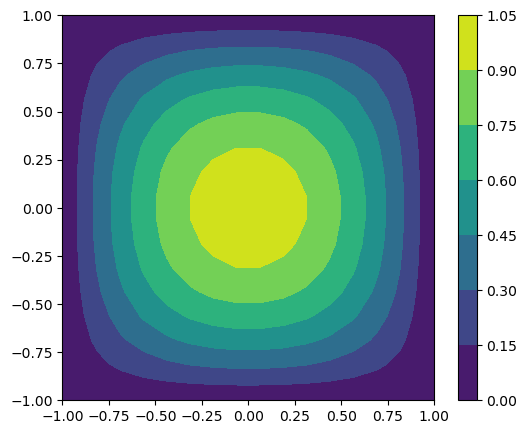

In [106]:
solution = np.zeros((ny+2, nx+2))

for j in range(npy):
    for i in range(npx):
        temp = np.array(pd.read_csv(f"{folder_name}/{file_name}_{j}{i}.csv", header=None))
        
        j_idx_sta = int(j*mx) + 1
        j_idx_end = int((j+1)*mx) + 1
        i_idx_sta = int(i*mx) + 1 
        i_idx_end = int((i+1)*mx) + 1
        
        solution[j_idx_sta:j_idx_end, i_idx_sta:i_idx_end] = temp[1:-1, 1:-1]

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))        
plt.contourf(X, Y, solution)
plt.colorbar()

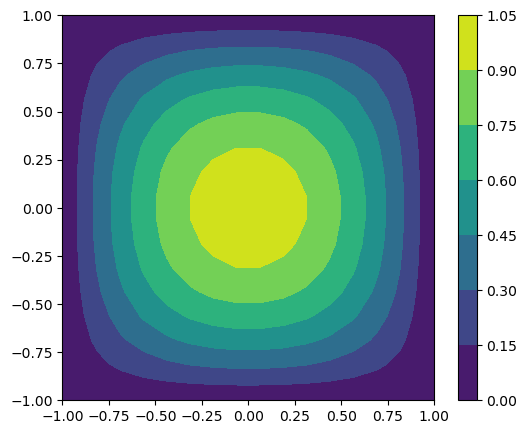

In [107]:
exact_solution = np.zeros((ny+2, nx+2))

for j in range(0, ny+2):
    for i in range(0, nx+2):
        exact_solution[j, i] = (1 - x[i]**2)*(1 - y[j]**2)

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))        
plt.contourf(X, Y, exact_solution)
plt.colorbar()

Error: 1.9289051175764545e-11


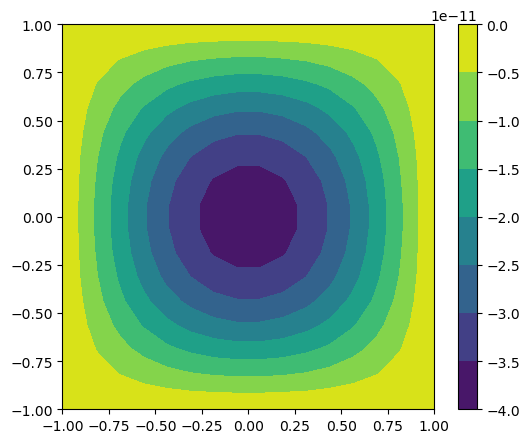

In [108]:
error = solution - exact_solution

X, Y = np.meshgrid(x, y)

plt.figure(figsize=(6, 5))        
plt.contourf(X, Y, error)
plt.colorbar()

print("Error:", np.sqrt(np.sum(error**2)/nx/ny))